In [1]:
#Bayesian inference on a pure birth process X-->2X with discrete observations
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.stats import poisson
from scipy.special import factorial

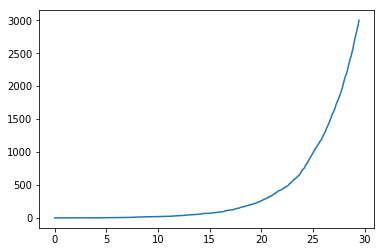

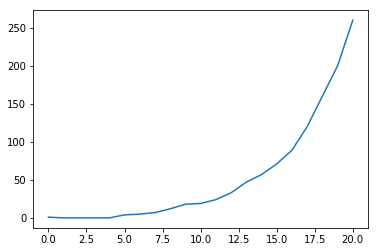

In [2]:
#generate data
trueA = 0.25
N=20     #end of observation time
nt = 3000
y=np.zeros(nt)
x=np.zeros(N+1)
t=np.zeros(nt)
y[0]=1
t[0]=0
for i in np.arange(1,nt):
    tstep = np.random.exponential(1./(trueA*y[i-1]))
    t[i]=t[i-1]+tstep
    y[i]=y[i-1]+1
plt.plot(t,y)
plt.show()

#subsample the trajectory on unit intervals
x[0]=y[0]
for i in range(1,N+1):
        for k in range(1,nt): 
            if t[k]>i-1 and t[k]<i:
                x[i]=y[k]; 
plt.plot(x)
plt.show()                

In [3]:
r_idx=np.arange(N)
x_ave=np.zeros(N)
Ashape = 2.5
Arate = 10
for i in range(N):
    x_ave[i]=0.5*(x[i]+x[i+1])

In [4]:
basic_model = pm.Model()

with basic_model: 
    #priors
    A = pm.Gamma('A', alpha=Ashape, beta=Arate )
    
    mu_r =A*x_ave
    r = pm.Poisson('r', mu= mu_r, shape=N) 
   
    #likelihood
    r_observed = r[r_idx]
    like_A = pm.Poisson('like_A', mu=A*x_ave, observed=r_observed)
    
    #instantiate sample
    step = pm.NUTS()
    trace = pm.sample(2000,step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [A]
>Metropolis: [r]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:06<00:00, 1580.92draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D8BAC59278>,
      dtype=object)

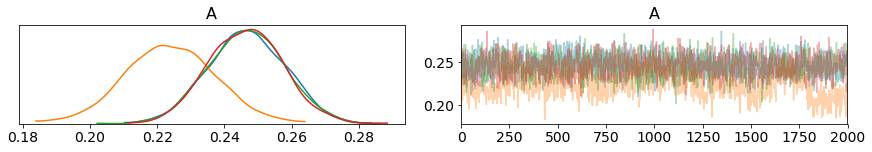

In [5]:
pm.traceplot(trace, var_names='A')

In [6]:
pm.summary(trace, var_names='A')

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
A,0.240659,0.015275,0.001068,0.209138,0.26856,4.658795,1.390262


In [ ]:
pm.traceplot(trace, var_names='r')